In [1]:
from iposcraper import ipo_df
import pandas as pd
from utils.plot_line import plot_line_graph
from utils.normalize import normalize

Waiting 1.67 seconds before next request...
Waiting 2.15 seconds before next request...
Waiting 1.05 seconds before next request...
Waiting 1.79 seconds before next request...
Waiting 2.88 seconds before next request...
Waiting 2.80 seconds before next request...
Waiting 2.65 seconds before next request...
Waiting 1.88 seconds before next request...
Waiting 2.38 seconds before next request...
Waiting 2.42 seconds before next request...
No table found on page 10. This could be the end of available data.
Scraped a total of 199 IPOs

Sample of scraped data:
      IPOdate             company     companyID Trading Location
0  13/02/2025       FERRARI GROUP  GB00BN0VZ646        Amsterdam
1  02/01/2025     VASTNED BELGIUM  BE0003754687        Amsterdam
2  20/12/2024  IRIS FINANCIAL SHA  KYG7552D1354        Amsterdam
3  16/12/2024               HAVAS  NL0015002AH0        Amsterdam
4  27/06/2024  THE LONDON TUNNELS  GB00BS28ZN53        Amsterdam
      IPOdate             company     companyID T

Error creating monthly IPO plot: 'Axes' object has no attribute 'show'


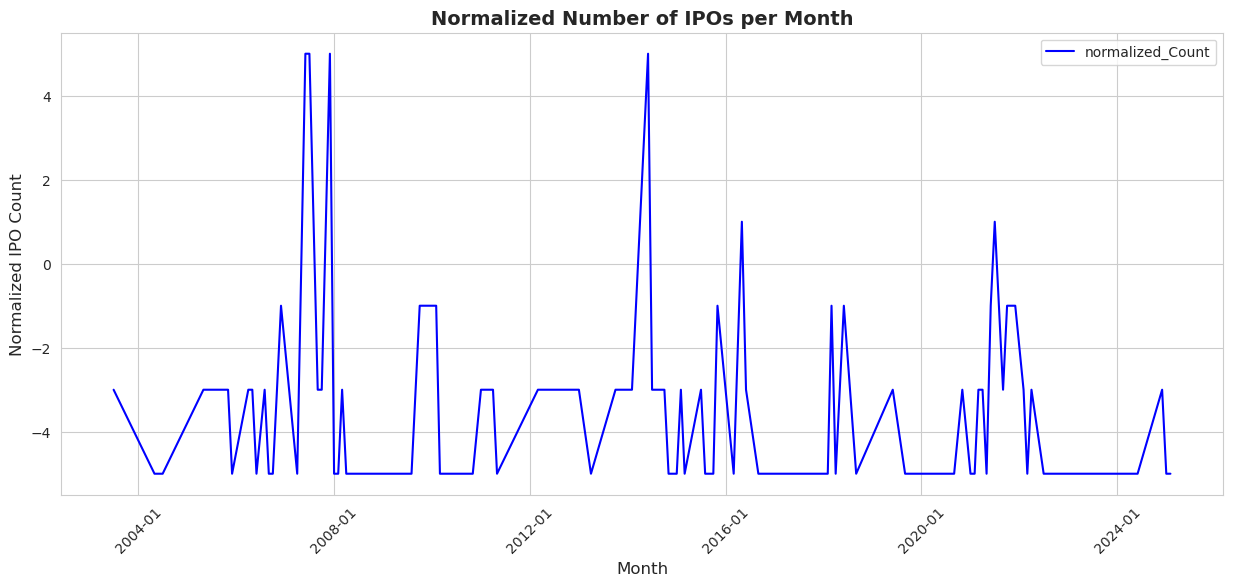

In [5]:
def plot_monthly_ipos(ipo_df):
    try:
        # Make sure IPOdate is in datetime format
        ipo_df["IPOdate"] = pd.to_datetime(ipo_df["IPOdate"])
        ipo_df = ipo_df.sort_values('IPOdate')
        
        # Group by year and month and count IPOs
        ipo_df['Year_Month'] = ipo_df['IPOdate'].dt.to_period('M').dt.to_timestamp()
        monthly_series = ipo_df.groupby('Year_Month').size()
        monthly_counts = monthly_series.reset_index(name='Count')

        monthly_counts = normalize(monthly_counts, "Count")

        # Use the plot_line_graph function for plotting
        _, plt = plot_line_graph(
            df=monthly_counts, 
            x_column='Year_Month', 
            y_column='normalized_Count',
            title='Normalized Number of IPOs per Month',
            xlabel='Month',
            ylabel='Normalized IPO Count',
            colors='blue',
            grid=True
        )

        plt.show()

    except Exception as e:
        print(f"Error creating monthly IPO plot: {e}")
        return None

summary = plot_monthly_ipos(ipo_df)